# Lecture 19-20 post-lecture quiz

In thie quiz, we show examples of visualize pair plots and three machine learning algorithms: KNN, SVM and BDT.
You will practice pairplot visualization, KNN and BDT. There are three tasks in total.

You need install following tools in order to run these practices
* pandas: open source data analysis and manipulation tool based on python
  https://pandas.pydata.org/
* seaborn: statistical data visualization
  https://seaborn.pydata.org/
* pydotplus
  https://pydotplus.readthedocs.io/
  - You will need graphviz
    https://pygraphviz.github.io/documentation/stable/install.html


In [1]:
# Loading higgs data set https://www.openml.org/search?type=data&sort=runs&id=23512
import pandas as pd
import numpy as np

In [2]:
# pandas: open source data analysis and manipulation tool based on python
#  https://pandas.pydata.org/

X_1 = pd.read_csv('Higgs.csv') 
print(X_1)

      target  lepton_pT  lepton_eta  lepton_phi  missing_energy_magnitude  \
0          0   0.775959   -2.309334    0.813288                  0.617624   
1          0   0.427509   -1.248682   -0.176687                  0.515826   
2          0   0.955307   -1.281797    1.676653                  0.312187   
3          0   0.292998   -2.130124    0.842696                  1.023439   
4          0   2.105520   -2.279141   -0.505165                  0.163724   
...      ...        ...         ...         ...                       ...   
9995       1   0.381574    1.716079   -1.601573                  1.320257   
9996       1   1.224880    0.901841    0.983076                  0.571285   
9997       1   1.613408    1.415123   -0.313738                  1.898730   
9998       1   1.031805    0.931060    0.124706                  1.657894   
9999       1   1.245194    0.806392   -0.010783                  1.309100   

      missing_energy_phi  jet_1_pt  jet_1_eta  jet_1_phi  jet_1_b-tag  ... 

In [3]:
# seaborn: statistical data visualization
#  https://seaborn.pydata.org/
# 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)


In [4]:
# Select 5 features to make scattering plots
feature_names=['target','m_lv','m_jjj','m_bb','m_wbb','m_wwbb']

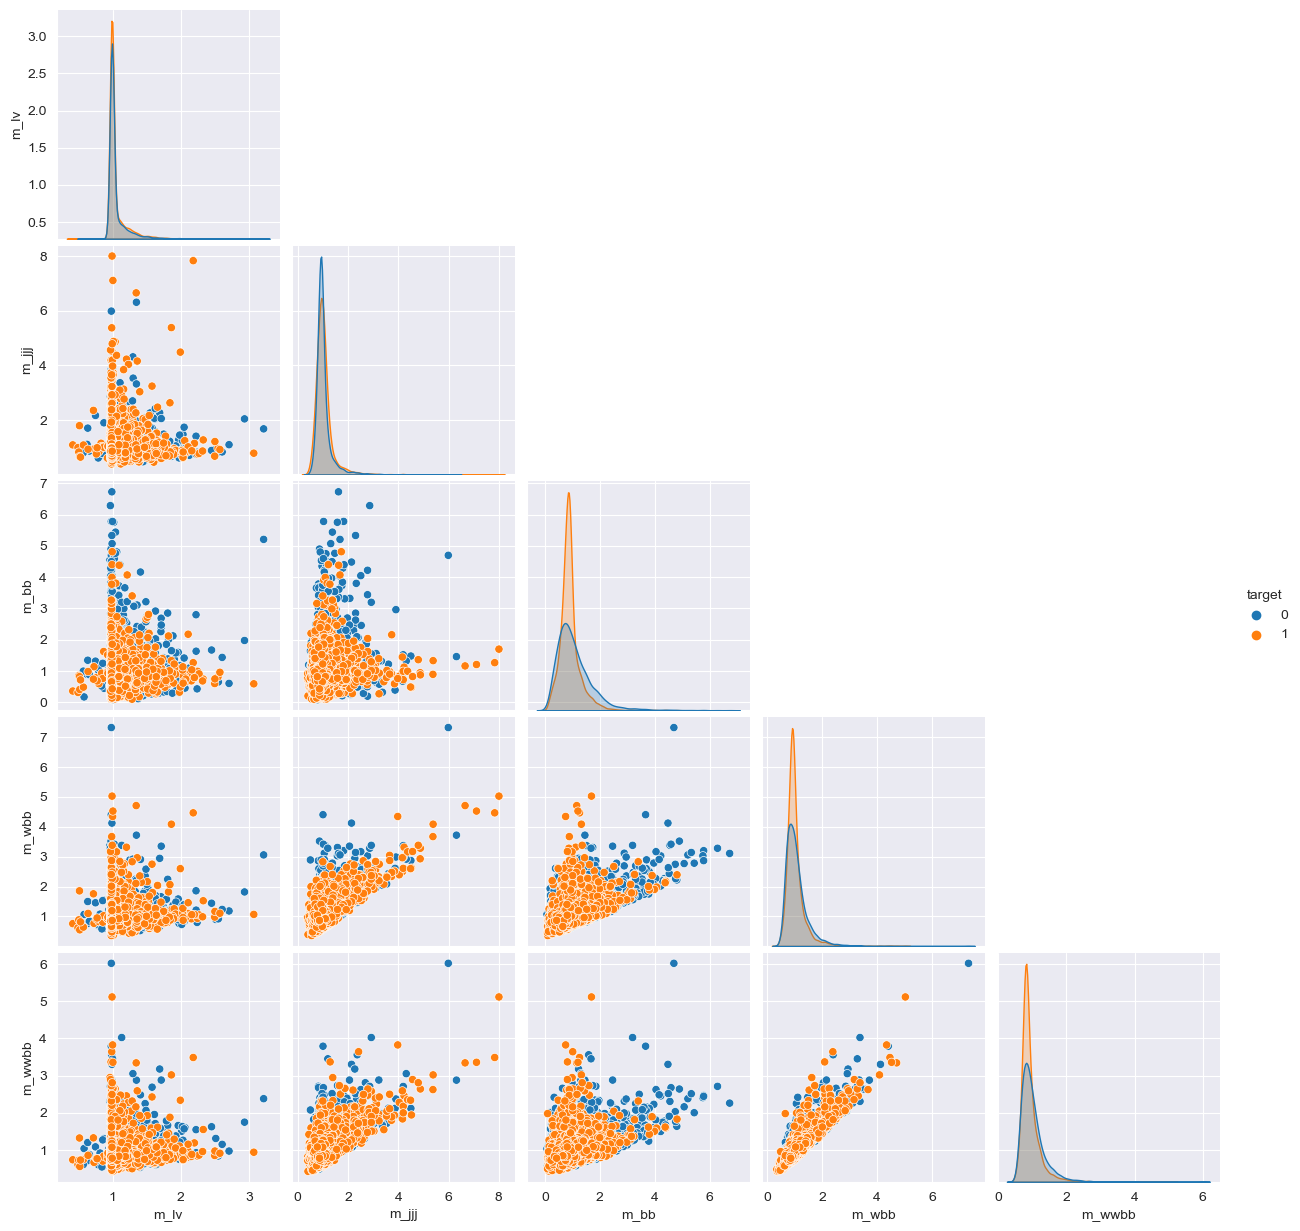

In [5]:
# We combine all the data so that we can map the different
# examples to different colors according to the classes.
# https://openml.github.io/openml-python/develop/examples/20_basic/simple_datasets_tutorial.html#visualize-the-dataset
# combined_data = pd.concat([X_reduced, y], axis=1)
iris_plot = sns.pairplot(X_1[feature_names],hue="target")
iris_plot.map_upper(hide_current_axis)
plt.show()

## Task 1: pair plot exercises

Make pair plots for other features 'lepton_eta','m_wbb','m_jjj','jet_1_eta','missing_energy_magnitude'

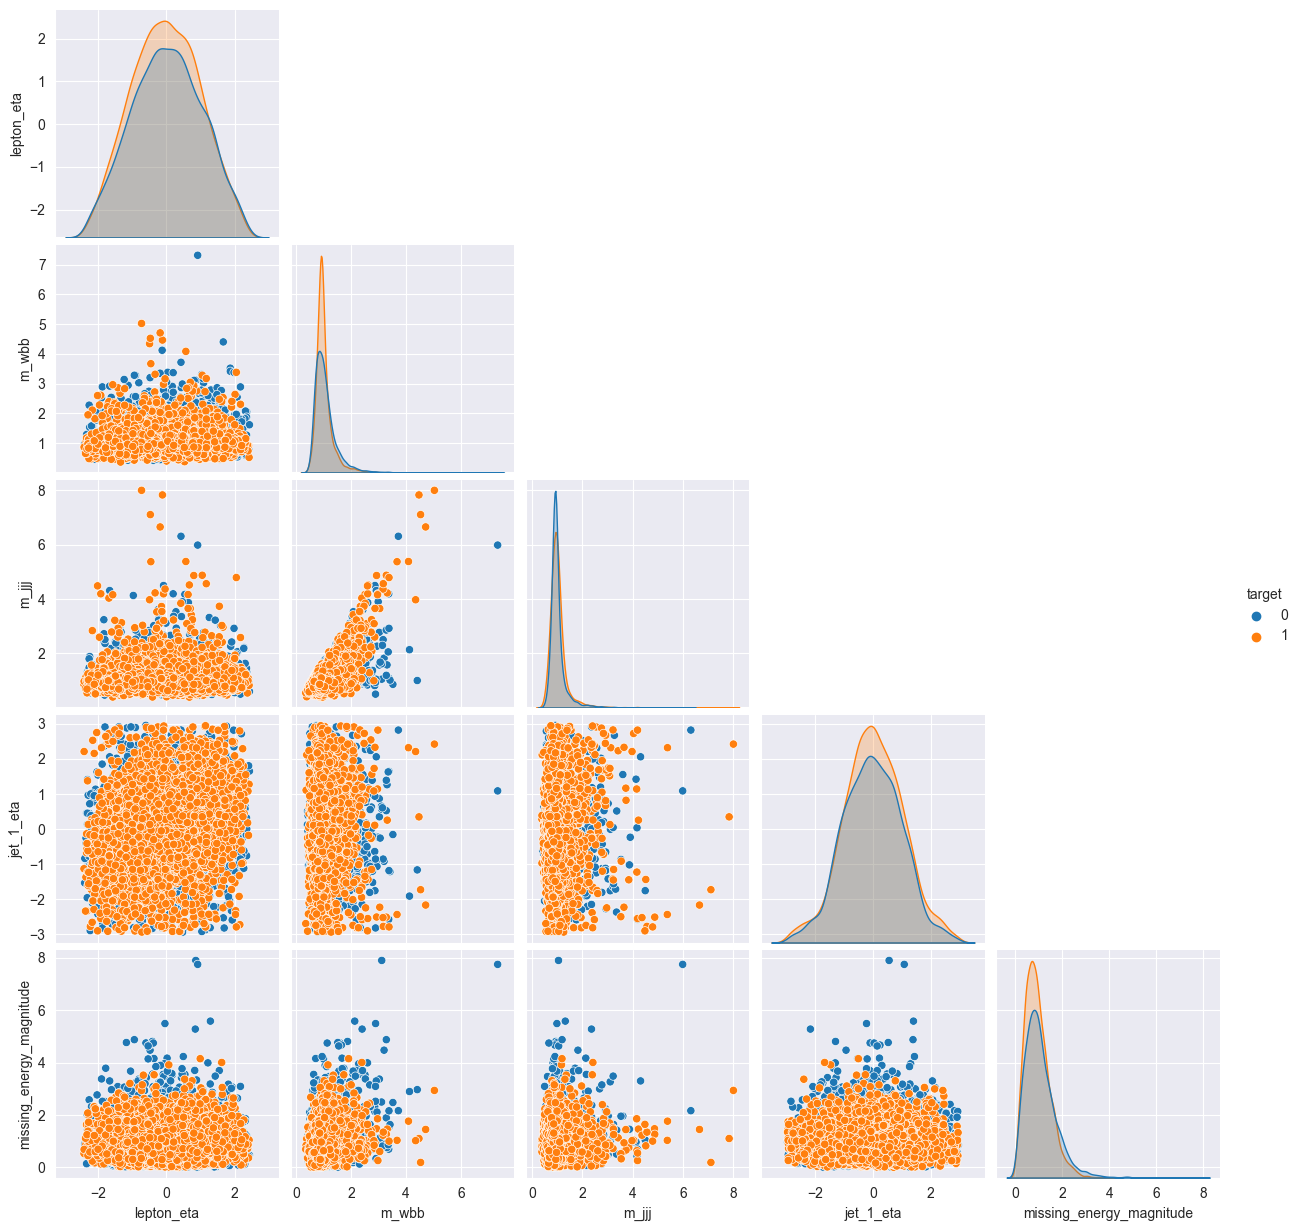

In [6]:
# Write your code here
# Select 5 features to make scattering plots: 'lepton_eta','m_wbb','m_jjj','jet_1_eta','missing_energy_magnitude'


In [7]:
# Select two variables for Machine Learning exercises
feature_cols = ['m_jjj','m_bb']

#feature_cols = ['m_lv','m_jlv','m_bb','m_wbb','m_wwbb']
#feature_cols = ['lepton_eta','m_wbb','m_jjj','jet_1_eta','missing_energy_magnitude']

X_reduced = X_1[feature_cols]
y_reduced = X_1['target']


In [8]:
print(y_reduced)

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: target, Length: 10000, dtype: int64


In [9]:
## split our data 70% validation 30% test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=1)

In [10]:
## scale our features 
## This can improve numerical stability by removing large dynamic range of kinematics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
# Create a new pandas dataframe from reduced and standardized numpy array 
X_train.shape
df_train=pd.DataFrame(data=X_train[0:,0:],
                index=[i for i in range(X_train.shape[0])],
                columns=feature_cols)
df_train["target"]=y_train
print(df_train)


         m_jjj      m_bb  target
0    -0.296101 -0.603481     0.0
1    -0.676059 -1.092023     0.0
2     7.398933 -1.098473     0.0
3    -0.716427  2.467740     0.0
4    -1.004302 -0.336852     NaN
...        ...       ...     ...
6995 -0.252885  0.005854     1.0
6996 -0.348858 -0.092022     NaN
6997 -0.356709  0.557944     1.0
6998 -0.582978 -0.327525     NaN
6999 -0.993458  0.098735     NaN

[7000 rows x 3 columns]


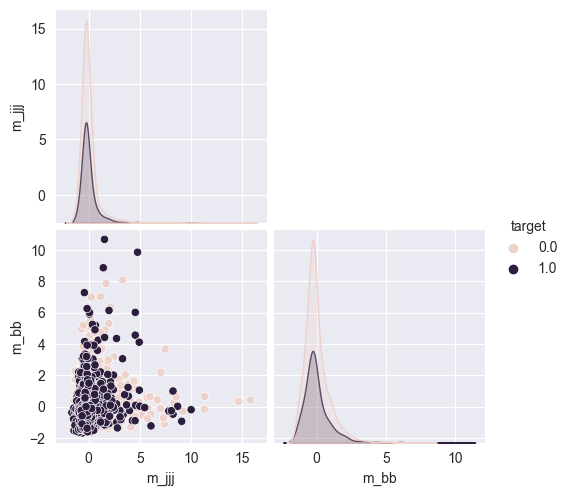

In [12]:
# Check the scatter plot of Standarded data
#  Standardize: Mean is 0 and STD is 1
iris_plot = sns.pairplot(df_train,hue="target")
iris_plot.map_upper(hide_current_axis)
plt.show()

# K-nearest Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",clf.score(X_test, y_test))


Accuracy: 0.5933333333333334


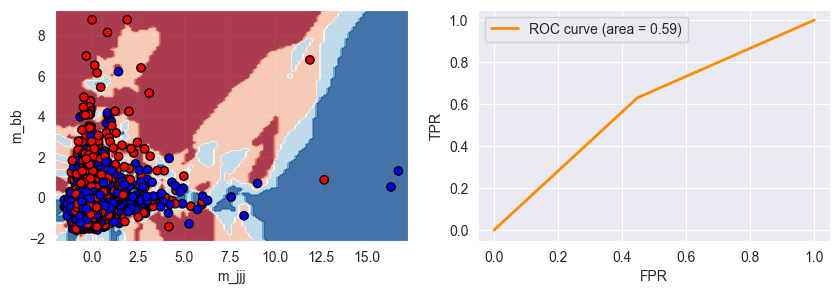

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn import metrics

plt.figure(figsize=(10,3))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1,2,1)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    clf, X_test, cmap=cm, alpha=0.8, ax=ax, eps=0.5
)
# Plot scatter plots
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k"
)

# Plot ROC curve
ax = plt.subplot(1,2,2)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc
)
plt.legend()
plt.show()

## Task 2: KNN practices

Task2a: Study KNN performance with K=7 and compute accuracy

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = # Write your code here

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",clf.score(X_test, y_test))



Accuracy: 0.612


Task2b: Compare performance to k=4
Write your answer here:


Make scatter and classification boundary plots, and ROC curves

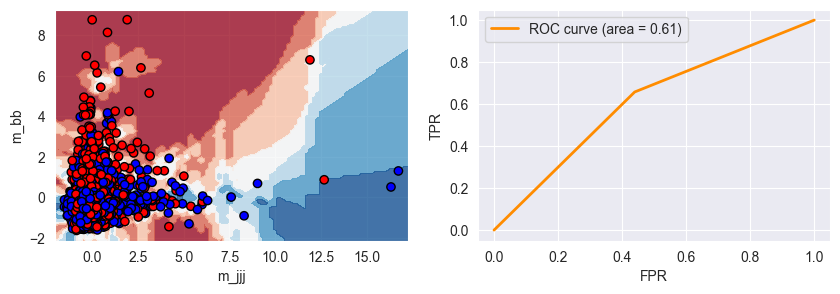

In [16]:
plt.figure(figsize=(10,3))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1,2,1)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    clf, X_test, cmap=cm, alpha=0.8, ax=ax, eps=0.5
)
# Plot scatter plots
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k"
)

# Plot ROC curve
ax = plt.subplot(1,2,2)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc
)
plt.legend()
plt.show()

# Support Vector Machines

In [17]:
from sklearn.svm import SVC
clf = SVC(kernel="linear", C=0.025)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",clf.score(X_test, y_test))


Accuracy: 0.5933333333333334


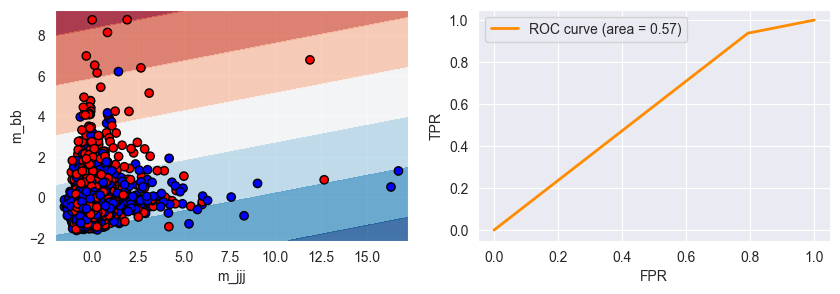

In [18]:
plt.figure(figsize=(10,3))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot Decision boundary
ax = plt.subplot(1,2,1)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])

DecisionBoundaryDisplay.from_estimator(
    clf, X_test, cmap=cm, alpha=0.8, ax=ax, eps=0.5
)

# Plot scatter plot
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k"
)


# Plot ROC curve
ax = plt.subplot(1,2,2)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc
)
plt.legend()
plt.show()

# Single Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",clf.score(X_test, y_test))

Accuracy: 0.6276666666666667


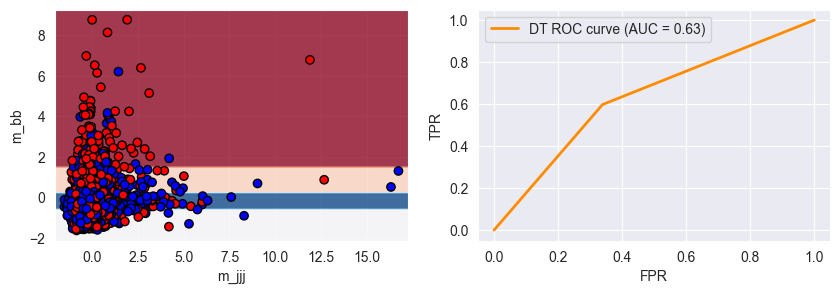

In [20]:
plt.figure(figsize=(10,3))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot Decision boundary
ax = plt.subplot(1,2,1)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])

DecisionBoundaryDisplay.from_estimator(
    clf, X_test, cmap=cm, alpha=0.8, ax=ax, eps=0.5
)

# Plot scatter plot
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k"
)


# Plot ROC curve
ax = plt.subplot(1,2,2)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="DT ROC curve (AUC = %0.2f)" % roc_auc
)
plt.legend()
plt.show()

Let's visuzalize the Tree

In [21]:
#install pydotplus
#install graphviz
#install https://pygraphviz.github.io/documentation/stable/install.html
# brew install graphviz
# pip3 install -U pydotplus

from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from io import StringIO

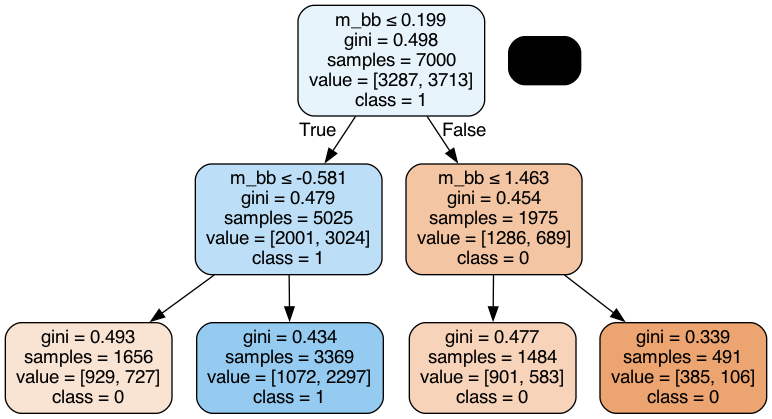

In [22]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In each node, the Better the separate between two classes, the smaller the gini index value.

We can visualize the discrimination score.

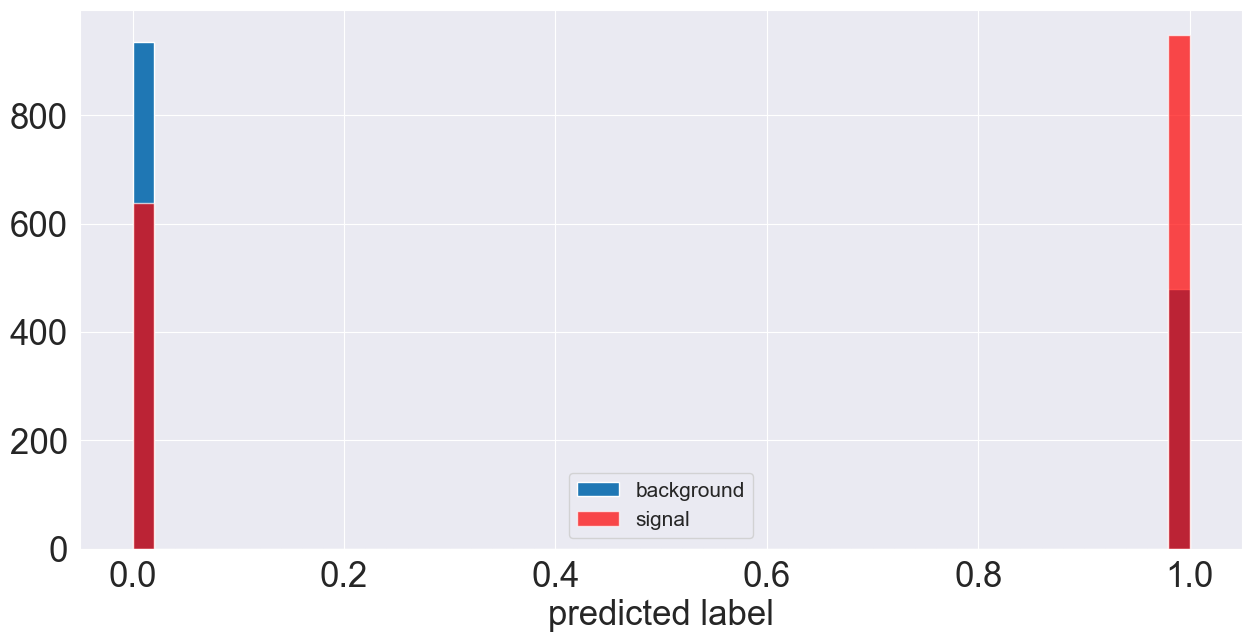

In [23]:
plt.figure(figsize=(15,7))
plt.hist(y_pred[y_test==0], bins=50, label='background')
plt.hist(y_pred[y_test==1], bins=50, label='signal', alpha=0.7, color='r')
plt.xlabel('predicted label', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

# Boosted Decision Tree

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
print("Accuracy:",clf.score(X_test, y_test))

Accuracy: 0.6476666666666666


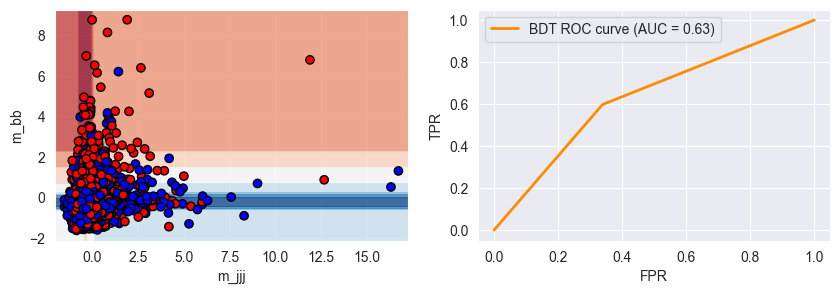

In [25]:
plt.figure(figsize=(10,3))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot Decision boundary
ax = plt.subplot(1,2,1)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])

DecisionBoundaryDisplay.from_estimator(
    clf, X_test, cmap=cm, alpha=0.8, ax=ax, eps=0.5
)

# Plot scatter plot
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k"
)


# Plot ROC curve
ax = plt.subplot(1,2,2)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="BDT ROC curve (AUC = %0.2f)" % roc_auc
)
plt.legend()
plt.show()

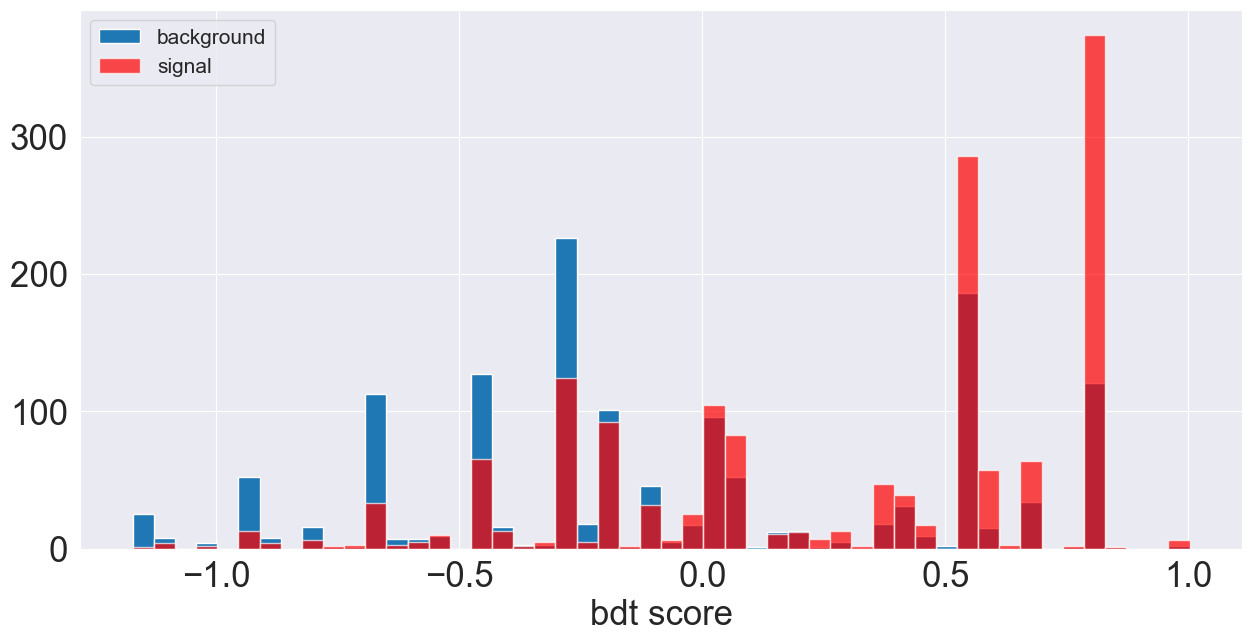

In [26]:
twoclass_output = clf.decision_function(X_test)
plt.figure(figsize=(15,7))
plt.hist(twoclass_output[y_test==0], bins=50, label='background')
plt.hist(twoclass_output[y_test==1], bins=50, label='signal', alpha=0.7, color='r')
plt.xlabel('bdt score', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

Visualize sub-trees

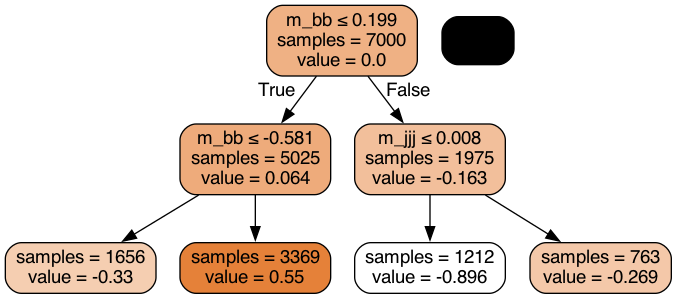

In [27]:
dot_data = StringIO()

# Get the tree number 1
sub_tree = clf.estimators_[1, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
    feature_names = feature_cols,class_names=['0','1'],
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


Visualize another sub-trees

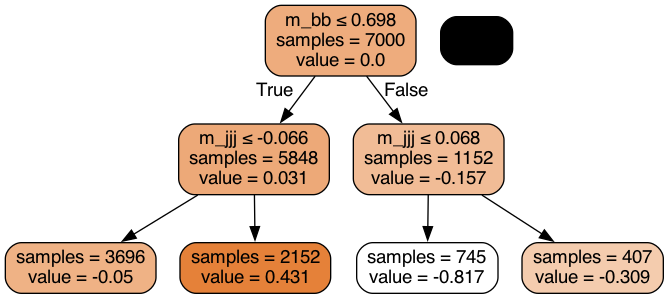

In [28]:
dot_data = StringIO()

# Get the tree number 5
sub_tree = clf.estimators_[5, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
    feature_names = feature_cols,class_names=['0','1'],
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


## Task 3: BDT
Using following features to train a BDT and compare the performance

lepton: 'lepton_pT','lepton_eta','lepton_phi'
missing energy: 'missing_energy_magnitude'
jet1:'jet_1_pt','jet_1_eta','jet_1_phi','jet_1_b-tag'
combined information: 'm_jlv','m_bb', 'm_wbb', 'm_wwbb'

In [29]:
# Prepare data arrays and target array
feature_cols=['lepton_pT','lepton_eta','lepton_phi',
              'missing_energy_magnitude',
              'jet_1_pt','jet_1_eta','jet_1_phi','jet_1_b-tag',
              'm_jlv','m_bb', 'm_wbb', 'm_wwbb']

X_reduced = X_1[feature_cols]
y_reduced = X_1['target']

## split our data 70% validation 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=1)

#Standardized training and testing data
# Write your code here



In [30]:
# Create BDT and use higher number of estimators 100, with learning rate=0.1 and max_depth 3.

from sklearn.ensemble import GradientBoostingClassifier
clf = # Write your code here

print("Accuracy:",clf.score(X_test, y_test))
 

Accuracy: 0.683


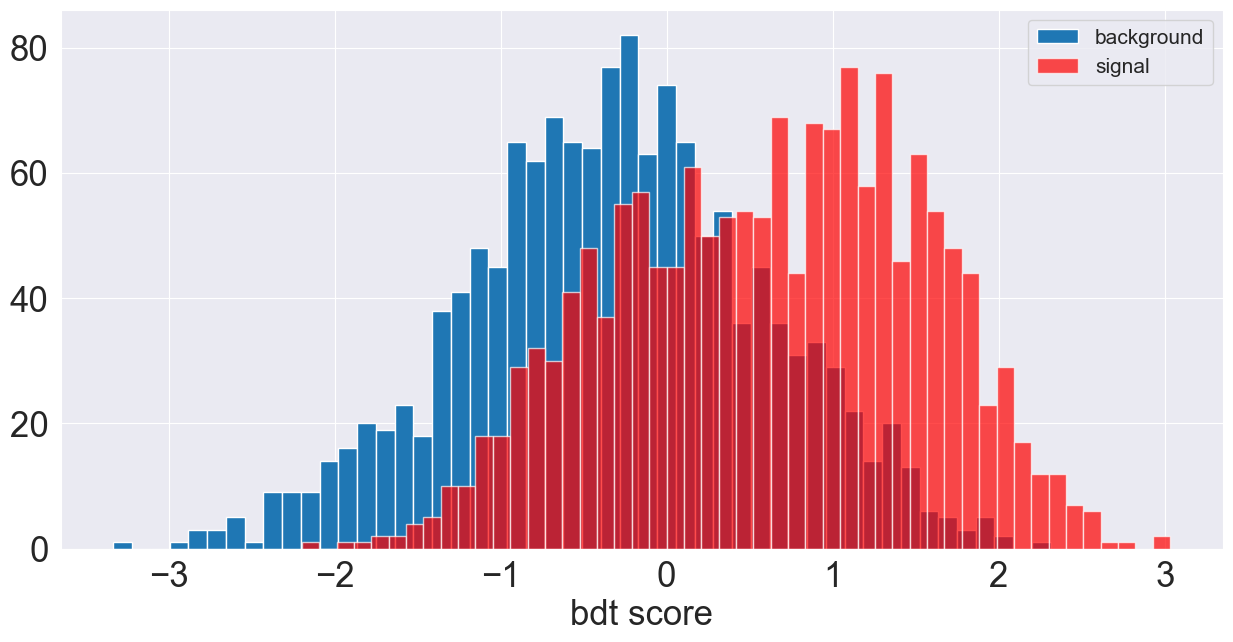

In [31]:
# Plot BDT score distribution in two groups
twoclass_output = clf.decision_function(X_test)
plt.figure(figsize=(15,7))
plt.hist(twoclass_output[y_test==0], bins=50, label='background')
plt.hist(twoclass_output[y_test==1], bins=50, label='signal', alpha=0.7, color='r')
plt.xlabel('bdt score', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

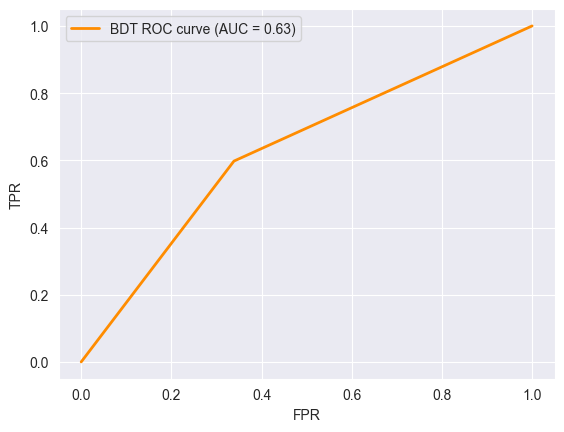

In [32]:
# Plot ROC curve
ax = plt.subplot()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="BDT ROC curve (AUC = %0.2f)" % roc_auc
)
plt.legend()
plt.show()